In [149]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [150]:
train_df = pd.read_csv(r"C:/Users/saura/Downloads/brainStroke/train.csv")
test_df = pd.read_csv(r"C:/Users/saura/Downloads/brainStroke/test.csv")
submission_df = pd.read_csv(r"C:/Users/saura/Downloads/brainStroke/sample_submission.csv")

In [151]:
train_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [152]:
train_df['stroke'].unique()

array([0, 1], dtype=int64)

In [153]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [154]:
train_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [155]:
train_df.nunique()

id                   15304
gender                   3
age                    106
hypertension             2
heart_disease            2
ever_married             2
work_type                5
Residence_type           2
avg_glucose_level     3740
bmi                    407
smoking_status           4
stroke                   2
dtype: int64

In [156]:
train_df.duplicated().sum()

0

In [157]:
sorted(train_df['age'].unique().tolist())[0:12]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.68, 0.72, 0.8, 0.88]

In [158]:
train_df['age'] = np.ceil(train_df['age'])
test_df['age'] = np.ceil(test_df['age'])

In [159]:
train_df['gender'].value_counts()

gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64

In [160]:
train_df.drop(train_df[train_df['gender']=='Other'].index, inplace=True)
test_df.drop(test_df[test_df['gender']=='Other'].index, inplace=True)

# **Exploratory Data Transform(EDA)**

In [161]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots as sp

sns.set_style('darkgrid')

In [162]:
plot_color = ['#008080', 'black']
sns.set_palette(['#008080', 'black'])

 ** Filter data for stroke and Non-Stroke  **

In [163]:
no_stroke = train_df[train_df['stroke']==0]
stroke_data = train_df[train_df['stroke']==1]

 **UnivariateAnalysis**

In [164]:
stroke_count = train_df['stroke'].value_counts()
stroke_count

stroke
0    14671
1      632
Name: count, dtype: int64

In [165]:
import plotly.io as pio
fig =px.pie(stroke_count,
            values=stroke_count.values, names=['Yes', 'No'],
            color_discrete_sequence=plot_color,
            title='Proportion of stroke cases')

fig.update_layout(legend_title_text = 'Stroke Status', title_x=0.49, title_y=0.9)
pio.renderers.default = "browser"
fig.show()

**BIVARIATE ANALYSIS**

In [166]:
def custom_histogram(columns:str, titles:list)->go.Figure:
  fig = sp.make_subplots(rows=1, cols=2, subplot_titles=['Yes Stroke', 'No Stroke'])
  histogram_no_stroke = px.histogram(no_stroke, x=columns, color_discrete_sequence=['#008080'])
  histogram_stroke = px.histogram(stroke_data, x=columns, color_discrete_sequence=['black'])
  fig.add_trace(histogram_no_stroke['data'][0], row=1, col=1)
  fig.add_trace(histogram_stroke['data'][0], row=1, col=2)
  fig.update_layout(title=titles[0], title_x=0.5)
  fig.update_xaxes(title_text=titles[1])
  fig.update_yaxes(title_text='Count')
  return fig

In [167]:
fig = custom_histogram('avg_glucose_level',['Average Glucose Level Distribution By Stroke', 'Average Glucose Level'])
fig.show()

In [168]:
fig = custom_histogram('bmi',['BMI Distribution By Stroke', 'BMI'])
fig.show()

In [169]:
stroke_data['bmi'].mean()

30.230696202531643

In [170]:
no_stroke['bmi'].mean()

28.02217163110899

In [171]:
fig = px.violin(train_df, y='bmi', x='stroke', box=True, width=700, height=500, color_discrete_sequence=['#008080'],
                title='BMI & STROKE STATUS',
                labels={'stroke':'Stroke Status', 'bmi': 'BMI Status'})
fig.update_layout(title_x=0.5, title_y=0.9)
fig.show()

In [172]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

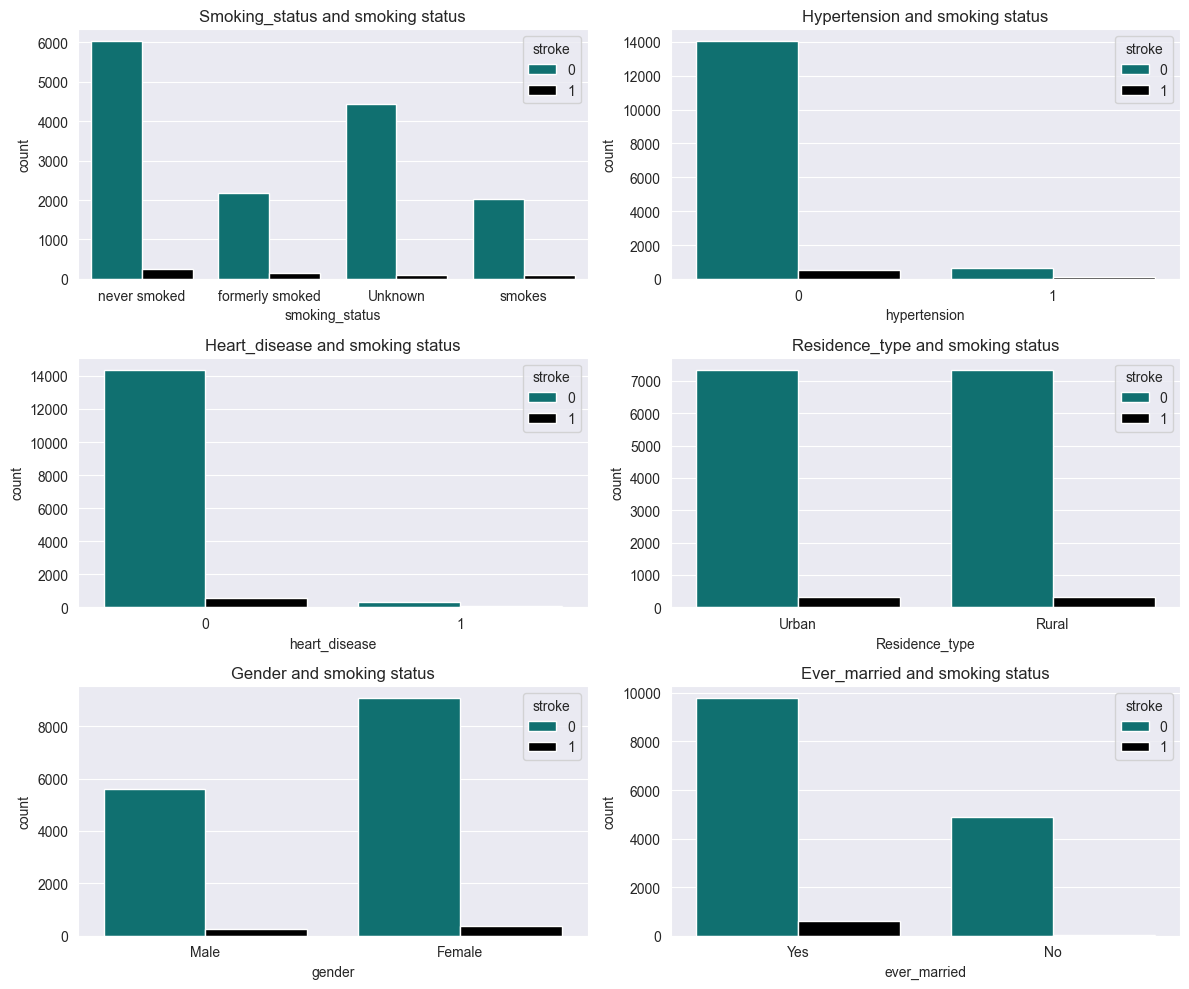

In [173]:
x_values =['smoking_status','hypertension', 'heart_disease','Residence_type','gender','ever_married']
fig, axis = plt.subplots(3,2, figsize=(12,10))

for ax, x_values in zip(axis.flatten(), x_values):
  sns.countplot(x=x_values, hue='stroke', data=train_df, ax=ax)
  ax.set_title(f'{x_values.capitalize()} and smoking status')

plt.tight_layout()
plt.show()

**Data Preparation and Preprocessing**

In [174]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import set_config

set_config(display='diagram')

In [175]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [176]:
input_cols = list(train_df.columns)[1:-1]
input_cols

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status']

In [177]:
target_col = 'stroke'

In [178]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

test_inputs = test_df[input_cols].copy()


In [179]:
numerical_cols = train_inputs.select_dtypes(exclude='object').columns.tolist()
numerical_cols

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

In [180]:
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()
categorical_cols

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [181]:
categorical_cols.remove('smoking_status')

In [182]:
train_df['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [183]:
ordinal_enc = OrdinalEncoder(categories=[['never smoked', 'Unknown', 'formerly smoked', 'smokes']])

In [184]:
onehot_enc = OneHotEncoder(handle_unknown='ignore')

In [185]:
preprocessor = ColumnTransformer([
    ('ordinal_enc', ordinal_enc, ['smoking_status']),
    ('onehot_enc', onehot_enc, categorical_cols)
])


In [186]:
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('ordinal_enc',
                                 OrdinalEncoder(categories=[['never smoked',
                                                             'Unknown',
                                                             'formerly smoked',
                                                             'smokes']]),
                                 ['smoking_status']),
                                ('onehot_enc',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['gender', 'ever_married', 'work_type',
                                  'Residence_type'])])

In [187]:
encoded_cols = list(preprocessor.get_feature_names_out())

In [188]:
encoded_cols

['ordinal_enc__smoking_status',
 'onehot_enc__gender_Female',
 'onehot_enc__gender_Male',
 'onehot_enc__ever_married_No',
 'onehot_enc__ever_married_Yes',
 'onehot_enc__work_type_Govt_job',
 'onehot_enc__work_type_Never_worked',
 'onehot_enc__work_type_Private',
 'onehot_enc__work_type_Self-employed',
 'onehot_enc__work_type_children',
 'onehot_enc__Residence_type_Rural',
 'onehot_enc__Residence_type_Urban']

In [189]:
train_inputs[encoded_cols] = preprocessor.transform(train_inputs)
test_inputs[encoded_cols] = preprocessor.transform(test_inputs)

In [190]:
X_train = train_inputs[numerical_cols+encoded_cols]
y_train = train_df[target_col]

X_test = test_inputs[numerical_cols+encoded_cols]

In [191]:
X_train.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,ordinal_enc__smoking_status,onehot_enc__gender_Female,onehot_enc__gender_Male,onehot_enc__ever_married_No,onehot_enc__ever_married_Yes,onehot_enc__work_type_Govt_job,onehot_enc__work_type_Never_worked,onehot_enc__work_type_Private,onehot_enc__work_type_Self-employed,onehot_enc__work_type_children,onehot_enc__Residence_type_Rural,onehot_enc__Residence_type_Urban
0,28.0,0,0,79.53,31.1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,33.0,0,0,78.44,23.9,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,42.0,0,0,103.00,40.3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,56.0,0,0,64.87,28.8,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,24.0,0,0,73.36,28.8,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [192]:
X_train.shape[1] == X_test.shape[1]

True

In [193]:
from sklearn.model_selection import train_test_split

In [194]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [195]:
X_train.shape

(12242, 17)

In [196]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import accuracy_score, recall_score,precision_score, f1_score
from sklearn.metrics import confusion_matrix as sk_confusion_matrix

In [197]:
from re import VERBOSE
models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('XGBoost', XGBClassifier()),
    ('LightGBM', LGBMClassifier(verbose=1))
]

In [198]:
def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    conf_matrix = sk_confusion_matrix(y_val, y_pred)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return conf_matrix, accuracy, recall, precision, f1

In [199]:
confusion_mats = {}
def metric_df(model, model_name):
    conf_matrix, accuracy, recall, precision, f1 = evaluate_model(
        model, X_train, y_train, X_val, y_val
    )

    confusion_mats[model_name] = conf_matrix

    metrics_dict = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Recall': [recall],
        'Precision': [precision],
        'F1': [f1]
    }

    return pd.DataFrame(metrics_dict)

In [200]:
predictions = []
for model_name, model in models:
    model_metrics = metric_df(model, model_name)
    predictions.append(model_metrics)

final_df = pd.concat(predictions, ignore_index=True)

c:\Users\saura\Downloads\brainStroke\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001477 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [201]:
predictions

[                 Model  Accuracy    Recall  Precision        F1
 0  Logistic Regression  0.954917  0.022388        0.3  0.041667,
            Model  Accuracy    Recall  Precision        F1
 0  Decision Tree  0.929435  0.238806   0.219178  0.228571,
            Model  Accuracy    Recall  Precision        F1
 0  Random Forest  0.953937  0.067164       0.36  0.113208,
      Model  Accuracy    Recall  Precision        F1
 0  XGBoost  0.952303  0.097015   0.342105  0.151163,
       Model  Accuracy    Recall  Precision        F1
 0  LightGBM  0.954263  0.052239       0.35  0.090909]

In [202]:
over_sampling = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = over_sampling.fit_resample(X_train, y_train)

In [203]:
X_train_resampled.shape

(23488, 17)

In [204]:
lr_with_smote = LogisticRegression()
lr_with_smote.fit(X_train_resampled, y_train_resampled)
lr_with_smote_pred = metric_df(lr_with_smote, 'Logistic Regression with SMOTE')
predictions.append(lr_with_smote_pred)


c:\Users\saura\Downloads\brainStroke\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

c:\Users\saura\Downloads\brainStroke\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [205]:
for model_name, confusion_matrix in confusion_mats.items():
    print(f"Confusion Matrix for {model_name}:")
    print(confusion_matrix)
    print()

Confusion Matrix for Logistic Regression:
[[2920    7]
 [ 131    3]]

Confusion Matrix for Decision Tree:
[[2813  114]
 [ 102   32]]

Confusion Matrix for Random Forest:
[[2911   16]
 [ 125    9]]

Confusion Matrix for XGBoost:
[[2902   25]
 [ 121   13]]

Confusion Matrix for LightGBM:
[[2914   13]
 [ 127    7]]

Confusion Matrix for Logistic Regression with SMOTE:
[[2920    7]
 [ 131    3]]



**VOTING CLASSIFIER :- HARD AND SOFT**

In [206]:
from sklearn.ensemble import VotingClassifier


In [207]:
estimator=[]
estimator.append(('Logistic Regression', LogisticRegression()))
estimator.append(('Decision Tree', DecisionTreeClassifier()))
estimator.append(('Random Forest', RandomForestClassifier()))
estimator.append(('XGBoost', XGBClassifier()))
estimator.append(('LightGBM', LGBMClassifier(verbose=1)))

In [208]:
estimators = [
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42)),
    ('lgbm', LGBMClassifier(random_state=42))
]

In [209]:
voting_clf_hard = VotingClassifier(estimators=estimators, voting='hard')
voting_clf_hard.fit(X_train, y_train)
voting_clf_mat = metric_df(voting_clf_hard, 'Voting Classifier Hard')
predictions.append(voting_clf_mat)

[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000673 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498
[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001033 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGB

In [210]:
voting_clf_mat

,Model,Accuracy,Recall,Precision,F1
0,Voting Classifier Hard,0.95361,0.037313,0.277778,0.065789


In [211]:
voting_clf_soft = VotingClassifier(estimators=estimator, voting='soft')
voting_clf_soft.fit(X_train, y_train)
voting_clf_soft_mat = metric_df(voting_clf_soft, 'Voting Classifier Soft')
predictions.append(voting_clf_soft_mat)

c:\Users\saura\Downloads\brainStroke\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


c:\Users\saura\Downloads\brainStroke\.venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 498, number of negative: 11744
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 623
[LightGBM] [Info] Number of data points in the train set: 12242, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.040680 -> initscore=-3.160498
[LightGBM] [Info] Start training from score -3.160498


In [212]:
voting_clf_soft_mat

,Model,Accuracy,Recall,Precision,F1
0,Voting Classifier Soft,0.953937,0.074627,0.37037,0.124224


In [213]:
prediction_base = pd.concat(predictions, ignore_index=True, sort=False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis='index')
prediction_base

Model,Accuracy,Recall,Precision,F1
Decision Tree,0.929435,0.238806,0.219178,0.228571
XGBoost,0.952303,0.097015,0.342105,0.151163
Voting Classifier Soft,0.953937,0.074627,0.370370,0.124224
Random Forest,0.953937,0.067164,0.360000,0.113208
LightGBM,0.954263,0.052239,0.350000,0.090909
Voting Classifier Hard,0.953610,0.037313,0.277778,0.065789
Logistic Regression,0.954917,0.022388,0.300000,0.041667
Logistic Regression with SMOTE,0.954917,0.022388,0.300000,0.041667


In [214]:
models_to_plot = [
    'Logistic Regression',
    'Decision Tree',
    'Random Forest',
    'XGBoost',
    'LightGBM',
    'Logistic Regression with SMOTE',

]

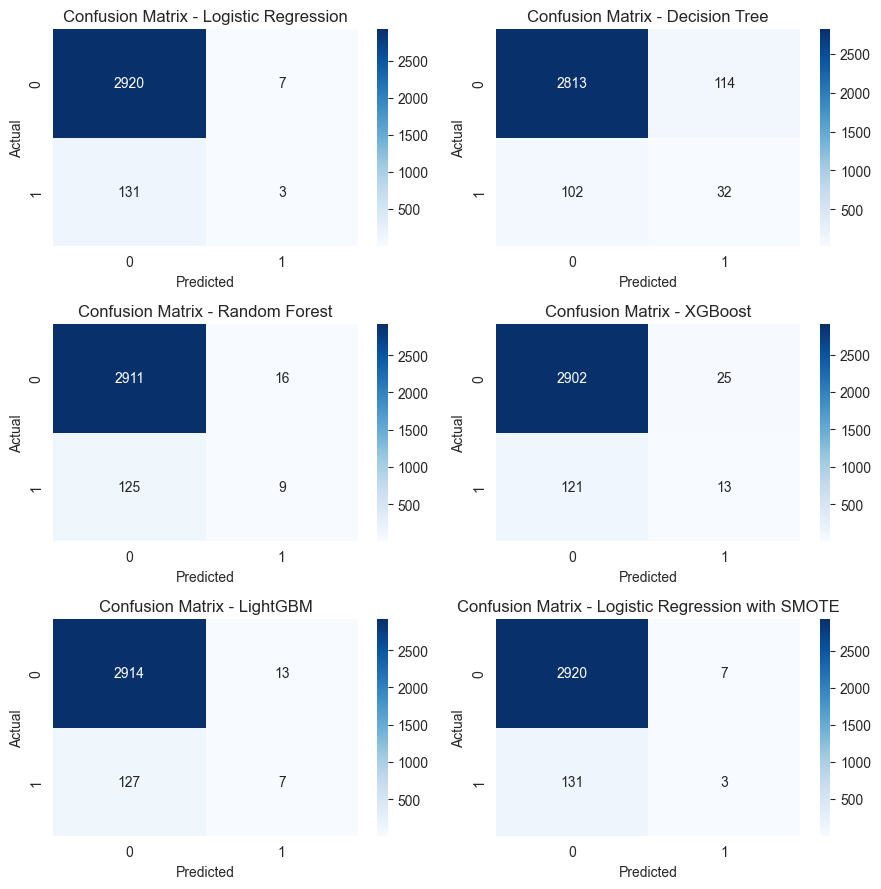

In [215]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 9))
axes = axes.flatten()

for i, model_name in enumerate(models_to_plot):
    conf_matrix = confusion_mats[model_name]
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'Confusion Matrix - {model_name}')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


**AUC AND ROC CURVE**

In [216]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

In [217]:
def plot_roc_curve(y_true, y_pred_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_proba)

    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2,
             label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid(True)

    return roc_auc

AUC Score: 0.990


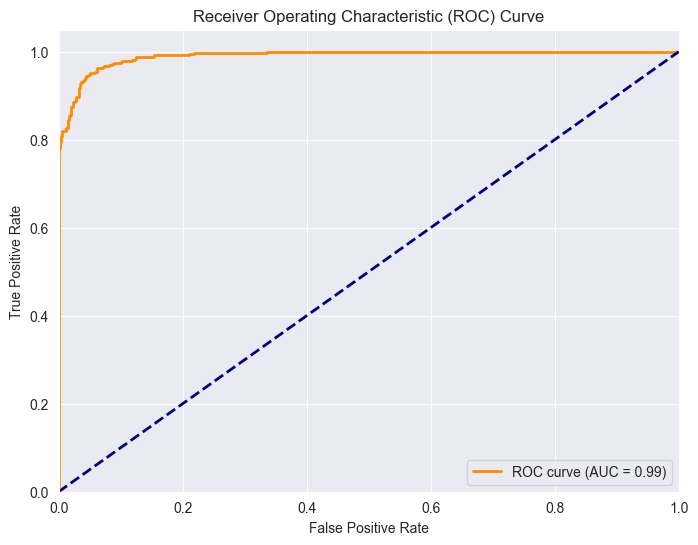

In [218]:
if __name__ == "__main__":
    np.random.seed(42)
    n_samples = 1000

    y_true = np.random.randint(0, 2, n_samples)

    y_pred_proba = y_true + np.random.normal(0, 0.3, n_samples)
    y_pred_proba = np.clip(y_pred_proba, 0, 1)

    auc_score = plot_roc_curve(y_true, y_pred_proba)
    print(f"AUC Score: {auc_score:.3f}")
    plt.show()

**RETRAIN AND SAVE MODEL**

In [219]:
X_train = train_inputs[numerical_cols+encoded_cols]
y_train = train_df[target_col]



In [220]:
preds = lr_with_smote.predict(X_test)

In [221]:
preds

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [222]:
sub_df = preds

In [223]:
pd.DataFrame(sub_df).to_csv('submission.csv', index=False)

In [224]:

importances = lr_with_smote.coef_[0]  # For Logistic Regression
feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})
feature_importance.sort_values(by='Importance', ascending=False)

,Feature,Importance
1,hypertension,0.515831
5,ordinal_enc__smoking_status,0.102072
2,heart_disease,0.094897
0,age,0.091244
4,bmi,0.016436
3,avg_glucose_level,0.008452
11,onehot_enc__work_type_Never_worked,-0.025048
12,onehot_enc__work_type_Private,-0.630981
10,onehot_enc__work_type_Govt_job,-0.712402
13,onehot_enc__work_type_Self-employed,-1.035617


In [225]:
sub_df = pd.read_csv('submission.csv')
sub_df.head()

,0
0,0
1,0
2,0
3,0
4,0


**With Decision Tree**

In [226]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline  # If using imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression


In [227]:
pipeline = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('scaler', StandardScaler()),  # Optional preprocessing
    ('classifier', LogisticRegression())  # Or DecisionTreeClassifier()
])

In [228]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('smote', SMOTE(random_state=42)), ('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

In [229]:
dt_preds = pipeline.predict(X_test)

In [230]:
sub_dt_df = pd.DataFrame(dt_preds)

In [231]:
sub_dt_df.to_csv('submission.csv', index=False)

In [232]:
sub_dt_df = pd.read_csv('submission.csv')
sub_dt_df.head()

,0
0,1
1,1
2,0
3,1
4,0


In [233]:
sub_dt_df['stroke'] = dt_preds
sub_dt_df

,0,stroke
0,1,1
1,1,1
2,0,0
3,1,1
4,0,0
...,...,...
10198,0,0
10199,0,0
10200,0,0
10201,0,0


In [234]:
prediction_base = pd.concat(predictions, ignore_index=True, sort=False)
prediction_base = prediction_base.sort_values(by=['Recall'], ascending=False).style.hide(axis='index')
prediction_base

Model,Accuracy,Recall,Precision,F1
Decision Tree,0.929435,0.238806,0.219178,0.228571
XGBoost,0.952303,0.097015,0.342105,0.151163
Voting Classifier Soft,0.953937,0.074627,0.370370,0.124224
Random Forest,0.953937,0.067164,0.360000,0.113208
LightGBM,0.954263,0.052239,0.350000,0.090909
Voting Classifier Hard,0.953610,0.037313,0.277778,0.065789
Logistic Regression,0.954917,0.022388,0.300000,0.041667
Logistic Regression with SMOTE,0.954917,0.022388,0.300000,0.041667


In [235]:
train_df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [236]:
single_inputs = {
    'gender': 'Male',
    'age': 50.0,
    'hypertension': 0,
    'heart_disease': 0,
    'ever_married': 'Yes',
    'work_type': 'Private',
    'Residence_type': 'Urban',
    'avg_glucose_level': 79.0,
    'bmi': 30.0,
    'smoking_status': 'formerly smoked'
}


In [237]:
input_df = pd.DataFrame([single_inputs])

In [238]:
input_df[encoded_cols]= preprocessor.transform(input_df)

In [239]:
X = input_df[numerical_cols+encoded_cols]


In [240]:
lr_with_smote.predict(X)

array([0], dtype=int64)

In [241]:
import joblib

In [242]:
model={
    'model': lr_with_smote,
    'preprocessor': preprocessor,
    'numerical_cols': numerical_cols,
    'categorical_cols': categorical_cols,
    'encoded_cols': encoded_cols,
    'target_col': target_col
}

In [243]:
joblib.dump(model, 'model.joblib')

['model.joblib']